In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv('dhaka homeprices.csv')

In [3]:
df

,area,price
0,2600,54000
1,3000,58500
2,3200,62000
3,3600,66000
4,4000,71000
5,5000,76000
6,2500,38000
7,2700,42000
8,1200,18000
9,5000,90000


In [4]:
df.head(5)

,area,price
0,2600,54000
1,3000,58500
2,3200,62000
3,3600,66000
4,4000,71000


In [5]:
df.shape #for checking the shape

(10, 2)

In [6]:
df.isnull().any() #for find out any null value is exist or not

area     False
price    False
dtype: bool

In [7]:
df.isnull().sum() #making the integer value summetion of null value

area     0
price    0
dtype: int64

# **Plot**

[]

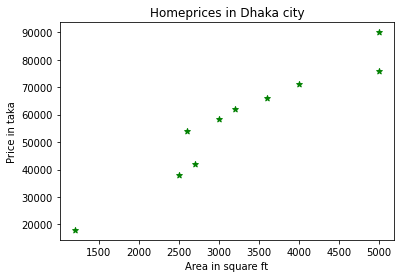

In [8]:
plt.xlabel('Area in square ft') #for x axis Area sqft
plt.ylabel('Price in taka') #for y axis price
plt.scatter(df['area'], df['price'],color='green', marker='*') #This code will determine how plotted data will show such in my case its star and green
plt.title('Homeprices in Dhaka city') #Heading of ploting
plt.plot()

In [9]:
# Separating dependent and independent variable
x = df['area']
y = df['price']

In [10]:
x

0    2600
1    3000
2    3200
3    3600
4    4000
5    5000
6    2500
7    2700
8    1200
9    5000
Name: area, dtype: int64

In [11]:
y

0    54000
1    58500
2    62000
3    66000
4    71000
5    76000
6    38000
7    42000
8    18000
9    90000
Name: price, dtype: int64

# **Splitting Data set**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state =1) #test_size=30% means 30% of my data will be collected for testing


In [14]:
xtrain

4    4000
0    2600
3    3600
1    3000
7    2700
8    1200
5    5000
Name: area, dtype: int64

In [15]:
xtest

2    3200
9    5000
6    2500
Name: area, dtype: int64

In [16]:
ytrain

4    71000
0    54000
3    66000
1    58500
7    42000
8    18000
5    76000
Name: price, dtype: int64

In [17]:
ytest

2    62000
9    90000
6    38000
Name: price, dtype: int64

X has 2 dimensions, where as, your xtrain and xtest clearly have one.
> Before fitting and predicting the model.



In [19]:
#This extracts a numpy array with the values of your pandas Series object and then reshapes it to a 2D array.
#The reason need to do this is that pandas Series objects are by design one dimensional.
xtrain= xtrain.values.reshape(-1, 1)
ytrain= ytrain.values.reshape(-1, 1)
xtest = xtest.values.reshape(-1, 1)

In [20]:
xtrain

array([[4000],
       [2600],
       [3600],
       [3000],
       [2700],
       [1200],
       [5000]])

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
reg = LinearRegression() #object creation

In [28]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [29]:
reg.predict(xtest)

array([[55740.28646691],
       [83832.31807705],
       [44815.60750741]])

In [30]:
reg.predict([[3800]])

array([[65104.29700362]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


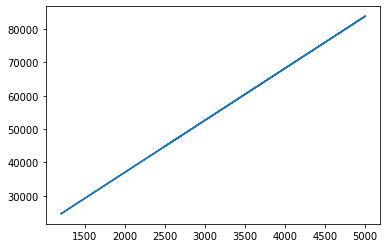

In [31]:
plt.plot(df.area,reg.predict(df[['area']])) #best fit line

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


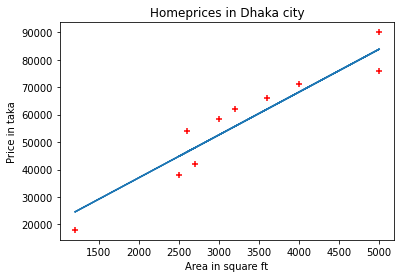

In [32]:
plt.xlabel('Area in square ft')
plt.ylabel('Price in taka')
plt.scatter(df['area'], df['price'],color='red', marker='+')
plt.title('Homeprices in Dhaka city')
plt.plot(df.area,reg.predict(df[['area']]))

In [33]:
reg.predict([[3000]])

array([[52618.94962134]])

In [34]:
reg.score(xtest,ytest)

0.9087031352012013

In [35]:
reg.intercept_

array([5798.89693777])

In [36]:
reg.coef_

array([[15.60668423]])

In [37]:
from sklearn.metrics import r2_score

pred = reg.predict(xtest)
score=r2_score(ytest,pred)

score

0.9087031352012013